Importing modules

In [5]:
reset -fs

In [6]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier

Loading the data

In [7]:
df = pd.read_excel('Drug_Risk.xls')

Dropping rows where people said they used Semer, since it is a fictional drug. Dropping the column ID

In [8]:
#df = df.drop(df[df.Semer !='CL0'].index)
#df.pop('ID')
#df.pop('Semer')
df.SS.head()

0   -1.18084
1   -0.21575
2    0.40148
3   -1.18084
4   -0.21575
Name: SS, dtype: float64

In [9]:
dict_age = {'-0.95197': '18-24','-0.07854': '25-34', '0.49788': '35-44','1.09449': '45-54','1.82213': '55-64',
            '2.59171': '65+'}

In [10]:
dict_sex = {'0.48246':'Female','-0.48246': 'Male'}

In [11]:
dict_edu = {'-2.43591': 'Left school','-1.73790': 'Left school','-1.43719': 'Left school at 17 years',
           '-1.22751': 'Left school at 18 years','-0.61113': 'Some college or university, no certificate or degree',
           '-0.05921': 'Professional certificate/ diploma', '0.45468': 'University degree',
           '1.16365': 'Masters degree', '1.98437': 'Doctorate degree'}

In [12]:
dict_cou = {'-0.09765': 'Australia', '0.24923': 'Canada', '-0.46841': 'New Zealand', '-0.28519': 'Other',
            '0.21128': 'Republic of Ireland','0.96082': 'UK','-0.57009': 'USA'}

In [13]:
dict_eth = {'-0.50212':'Asian','-1.10702': 'Black','1.90725': 'Mixed-Black/Asian',
            '0.12600': 'Mixed-White/Asian','-0.22166' :'Mixed-White/Black','0.11440': 'Other'
            ,'-0.31685': 'White'}

In [14]:
drugs= ['Alcohol', 'Amphet', 'Amyl', 'Benzos','Caff','Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Nicotine','VSA']

In [15]:
for i in range(len(drugs)):
    df[drugs[i]] = df[drugs[i]].replace('CL0',0).replace('CL1',0).replace('CL2',0).replace('CL3',1).replace('CL4',1).replace('CL5',1).replace('CL6',1)
    

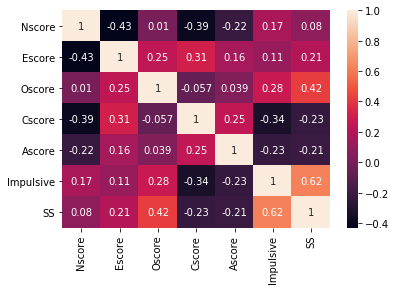

In [17]:
df_corr = pd.DataFrame(df,columns=['Nscore','Escore','Oscore','Cscore','Ascore','Impulsive','SS'])

corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
soft_drugs = [ 'Alcohol','Caff','Choc', 'Nicotine']
middle_drugs = [ 'Amyl','Cannabis', 'Ecstasy', 'Ketamine', 'LSD','Legalh','Shrooms','VSA']
hard_drugs =  ['Amphet','Benzos', 'Coke', 'Crack', 'Heroin', 'Meth']

In [46]:
cat_features = ['Age','Gender','Education','Country','Ethnicity','Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff',
                'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
                'Shrooms', 'Nicotine', 'VSA']

In [20]:
df['Nscore']= df['Nscore'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null category
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null int64
Amphet       1885 non-null int64
Amyl         1885 non-null int64
Benzos       1885 non-null int64
Caff         1885 non-null int64
Cannabis     1885 non-null int64
Choc         1885 non-null int64
Coke         1885 non-null int64
Crack        1885 non-null int64
Ecstasy      1885 non-null int64
Heroin       1885 non-null int64
Ketamine     1885 non-null int64
Legalh       1885 non-null int64
LSD       

In [21]:
df[cat_features]= df[cat_features].astype('category')

In [22]:
num_features = list(df.columns[df.dtypes==float])

In [23]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [24]:
for d in df.columns:
    X = df.drop(d,axis=1)
    y = df[d]
    globals()["X_train_" + str(d)], globals()["X_test_" + str(d)], globals()["y_train_" + str(d)], globals()["y_test_" + str(d)] = train_test_split(X, y, test_size=0.25, random_state=5)

In [47]:
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('1hot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([('num', num_pipeline, num_features),('cat', cat_pipeline, cat_features)])


In [48]:
pipe_randfor = Pipeline([('preprocessor', preprocessor),('randfor', GradientBoostingClassifier(max_features=1))])

In [49]:
y_train_predicted = cross_val_predict(pipe_randfor, X_train_Choc, y_train_Choc, cv=5)


In [50]:
y_train_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
print('Cross validation scores:')
print('-------------------------')
print("Accuracy: {:.2f}".format(accuracy_score(y_train_Choc, y_train_predicted)))
print("Recall: {:.2f}".format(recall_score(y_train_Choc, y_train_predicted)))
print("Precision: {:.2f}".format(precision_score(y_train_Choc, y_train_predicted)))

Cross validation scores:
-------------------------
Accuracy: 0.97
Recall: 1.00
Precision: 0.97
